In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [54]:
data=pd.read_csv('data/3D_spatial_network.csv')
print(data.shape)
print(data)


(434874, 4)
               x1        x2         x3          y
0       144552912  9.349849  56.740876  17.052772
1       144552912  9.350188  56.740679  17.614840
2       144552912  9.350549  56.740544  18.083536
3       144552912  9.350806  56.740485  18.279465
4       144552912  9.351053  56.740486  18.422974
...           ...       ...        ...        ...
434869   93323205  9.936479  57.499686  20.134033
434870   93323205  9.935696  57.499426  20.580884
434871   93323205  9.935009  57.499282  19.733141
434872   93323209  9.943479  57.495919  24.027015
434873   93323209  9.943451  57.496270  24.635285

[434874 rows x 4 columns]


In [53]:
attributes=['x1','x2','x3']


In [55]:
def normalization(data,attributes): #goto range[0,1] for all attributes
    for x in attributes:
        X=data[x]
        data[x]=X/X.max()
    return data

In [56]:
#normalization
data=normalization(data,attributes)
print("normall data=",data)

normall data=               x1        x2        x3          y
0       0.916386  0.834858  0.982517  17.052772
1       0.916386  0.834888  0.982514  17.614840
2       0.916386  0.834921  0.982512  18.083536
3       0.916386  0.834944  0.982511  18.279465
4       0.916386  0.834966  0.982511  18.422974
...          ...       ...       ...        ...
434869  0.591618  0.887239  0.995657  20.134033
434870  0.591618  0.887169  0.995652  20.580884
434871  0.591618  0.887108  0.995650  19.733141
434872  0.591618  0.887864  0.995592  24.027015
434873  0.591618  0.887862  0.995598  24.635285

[434874 rows x 4 columns]


In [63]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=75)
print(data_train)
print(data_test)
t0=0
t1=0
t2=0
t3=0
theta_list=[t0,t1,t2,t3]
x1=data_train['x1']
x2=data_train['x2']
x3=data_train['x3']
y=data_train['y']

h=t0+(t1*x1)+(t2*x2)+(t3*x3)# function witch we want to find it
print("h=",h)

              x1        x2        x3          y
293667  0.995155  0.748158  0.985322  15.597553
413048  0.804027  0.835047  0.989363  26.847966
137903  0.600432  0.870365  0.985889  43.165659
51829   0.632401  0.880049  0.988906   4.247855
376610  0.278407  0.919776  0.996444  15.357842
...          ...       ...       ...        ...
139200  0.666932  0.859305  0.991893  14.129283
211080  0.907356  0.879332  0.986580   8.555745
198675  0.162671  0.893111  0.997025  13.775902
287088  0.203272  0.769041  0.989044  42.810972
397560  0.690797  0.861326  0.980835  40.836208

[326155 rows x 4 columns]
              x1        x2        x3          y
367967  0.796777  0.893165  0.989296  55.735237
185060  0.780658  0.943333  0.999698   3.930952
174380  0.222117  0.879230  0.986644  27.144570
41645   0.838328  0.888511  0.987580  22.077068
134875  0.693320  0.831361  0.986941   3.683765
...          ...       ...       ...        ...
371747  0.604039  0.895323  0.993839  27.225830
236215  0.768

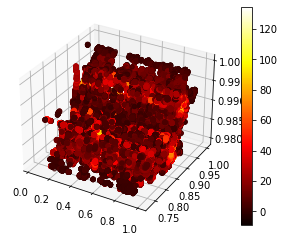

In [58]:
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
img = ax.scatter(x1, x2, x3, c=y, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [64]:
def predict(data,attributes,theta_list):
    summ=theta_list[0]
    ind=1
    for x in attributes:
        X=data[x]
        summ=summ+(X*theta_list[ind])
        ind=ind+1
    return summ
predict(data_train,attributes,theta_list)

293667    0.0
413048    0.0
137903    0.0
51829     0.0
376610    0.0
         ... 
139200    0.0
211080    0.0
198675    0.0
287088    0.0
397560    0.0
Length: 326155, dtype: float64

In [68]:
#train to find t0,t1,t2,t3
iteration=600
lr=0.001
t0=0
t1=0
t2=0
t3=0
theta_list=[t0,t1,t2,t3]
n=float(len(data_train))
print("n=",n)
for i in range(iteration):
    pr=predict(data_train,attributes,theta_list)
    d_t0=(1/n)* sum(pr-y)
    d_theta_list=[d_t0]
    for x in attributes:
        X=data_train[x]
        d_t=(1/n)*sum(X*(pr-y) )
        d_theta_list.append(d_t)
    t0=t0-(lr*d_theta_list[0])
    new_theta_list=[t0]
    for j in range(len(attributes)): # number of theta is 1 more than number of attributes
        t=theta_list[j+1]-(lr*d_theta_list[j+1])# theta0 is updated before for
        new_theta_list.append(t)
    theta_list=new_theta_list
    if i%100==0:
        y_pr=predict(data_test,attributes,theta_list)
        mae=MAE(y_pr,data_test['y'])
        rsme=RSME(y_pr,data_test['y'])
        print("in iteration",i," MAE=",mae,"RSME=",rsme)

n= 326155.0
error= 128.17022187039973
in iteration 0  MAE= 22.133031687095432 RSME= 28.908732916999313
error= 122.13507605813896
in iteration 100  MAE= 17.355252803411524 RSME= 24.62593810212914
error= 117.72188875254726
in iteration 200  MAE= 15.434738209925412 RSME= 21.995140724886955
error= 114.49478383248957
in iteration 300  MAE= 14.63006071049627 RSME= 20.449096746532184
error= 112.13501991898737
in iteration 400  MAE= 14.334713351088414 RSME= 19.5716551032892
error= 110.40951228604868
in iteration 500  MAE= 14.265100631432526 RSME= 19.085389981046927


In [69]:
print("all theat are ",theta_list)
Y=predict(data_test,attributes,theta_list)
print("predict=",Y)


all theat are  [5.996585216887292, 3.922406462712761, 5.231360801828452, 5.9211958401462]
predict= 367967    19.652153
185060    19.912964
174380    17.309501
41645     19.780621
134875    18.909086
            ...    
371747    18.934347
236215    19.703860
145434    19.644251
43873     19.793901
271100    17.373031
Length: 108719, dtype: float64


In [70]:
def MAE(y_pr,y_val):
    error = abs(y_pr - y_val)
    print("error=",error.max())
    loss = (error).mean()
    return loss
MAE(Y,data_test['y'])

error= 109.15857564356921


14.288602611190504

In [71]:
def RSME(y_pr,y_val):
    error = (y_pr - y_val)
    loss = (error**2).mean()
    l=math.sqrt(loss)
    return l
print(RSME(Y,data_test['y']))

18.821736950843462
